In [1]:
import pandas as pd
import numpy as np

def readDF(name):
    df = pd.read_csv('Data/SlicedData/' + name + '.csv')
    df = df.rename(columns = {'Unnamed: 0' : 'Index'})
    df = df.set_index('Index', drop = True)
    return df

df1 = readDF('df1')
df2 = readDF('df2')
df3 = readDF('df3')
df4 = readDF('df4')

returnTime = lambda df: np.linspace(0, len(df) / 2 - 0.5, len(df))
time1 = returnTime(df1)
time2 = returnTime(df2)
time3 = returnTime(df3)
time4 = returnTime(df4)

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal

mpl.rc('font', family = 'Times New Roman', size = 20)

def freqAnalysis(time, sig, nperseg, tit):
    n = len(sig)
    k = np.arange(n)
    sr = 1 / (time[1] - time[0])
    T = n / sr
    freq = k / T
    freq = freq[range(int(n / 2))]
    y = np.fft.fft(sig)
    y = y[range(int(n / 2))]
    f, t, Z = signal.stft(sig, sr, nperseg = nperseg)
    plt.figure(figsize = (13, 20))
    plt.title(tit)
    plt.subplot(3, 1, 1)
    plt.plot(time, sig, 'black')
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude [m/$s^2$]')
    plt.ylim([-15, 15])
    plt.grid(True)
    plt.subplot(3, 1, 2)
    plt.plot(freq, abs(y), 'black', linestyle = ' ', marker = '^') 
    plt.xlabel('Freq [Hz]')
    plt.ylabel('|Y(freq)| [m/$s^2$]')
    plt.vlines(freq, [0], abs(y))
    plt.xlim([0, freq[-1]])
    plt.ylim([0, 400])
    plt.grid(True)
    plt.subplot(3, 1, 3)
    plt.pcolormesh(t, f, np.abs(Z), vmin = 0, vmax = 1, shading = 'gouraud')
    plt.xlabel('STFT Magnitude [m/$s^2$]')
    plt.ylabel('Frequency [Hz]')
    plt.show()

def plotFA(t, df, nperseg):    
    freqAnalysis(t, df.AccX, nperseg, 'AccX')
    freqAnalysis(t, df.AccY, nperseg, 'AccY')
    freqAnalysis(t, df.AccZ, nperseg, 'AccZ')

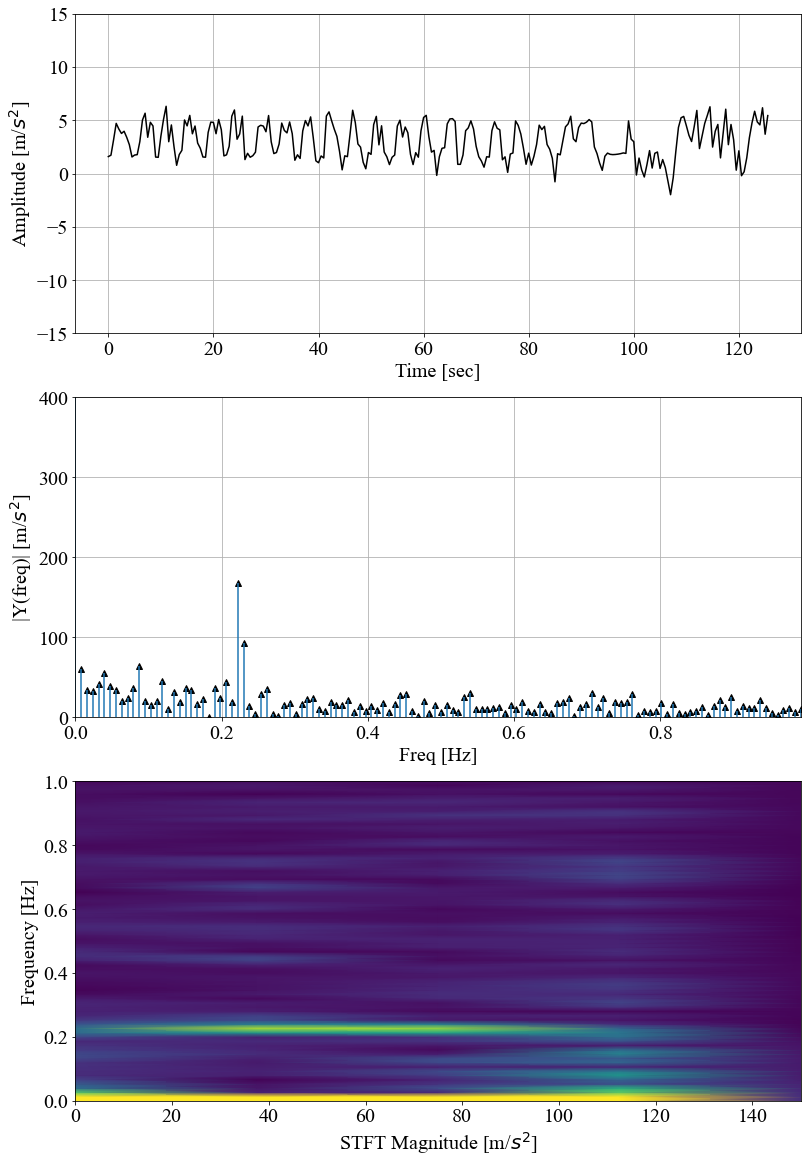

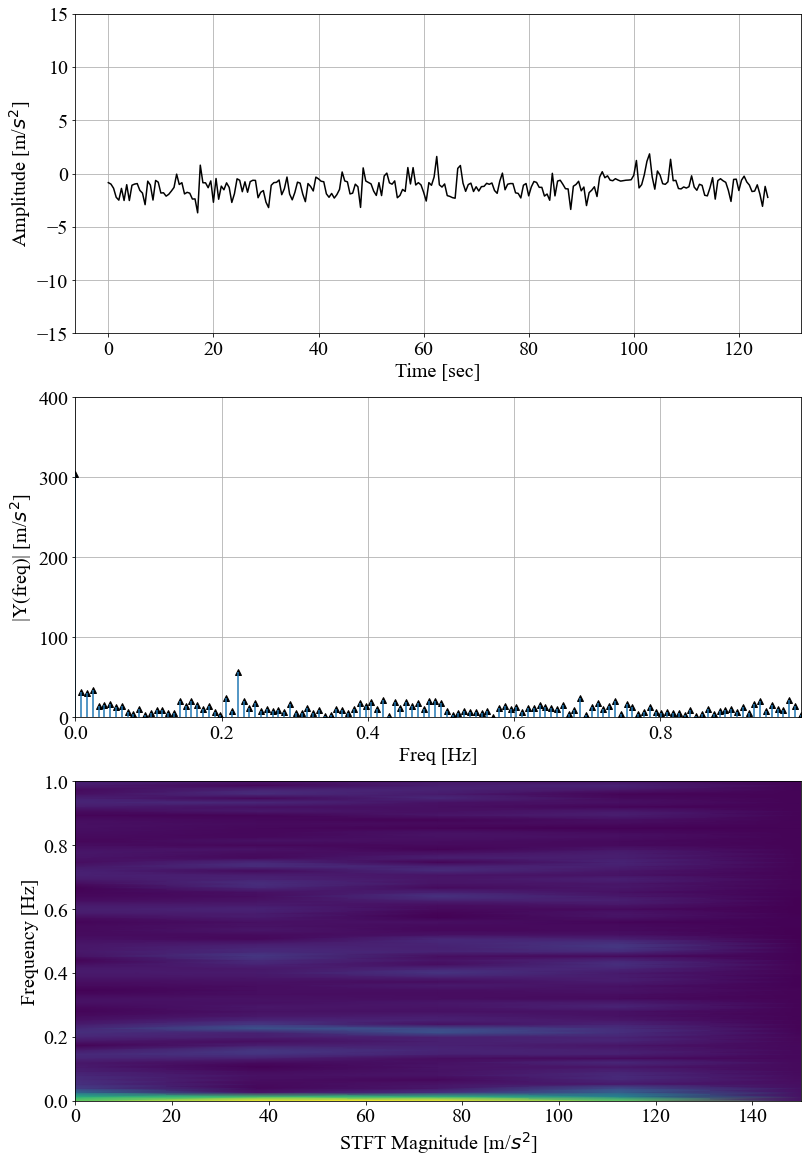

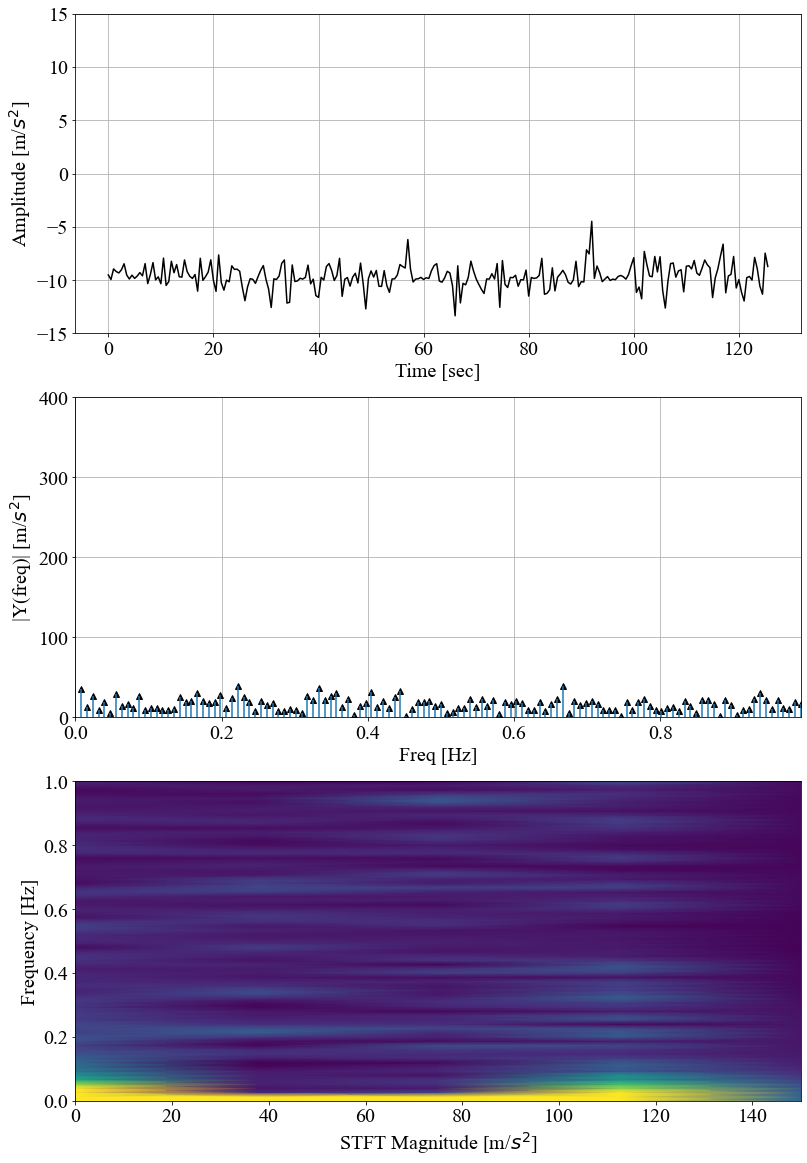

In [3]:
nperseg = 150
plotFA(time1, df1, nperseg)

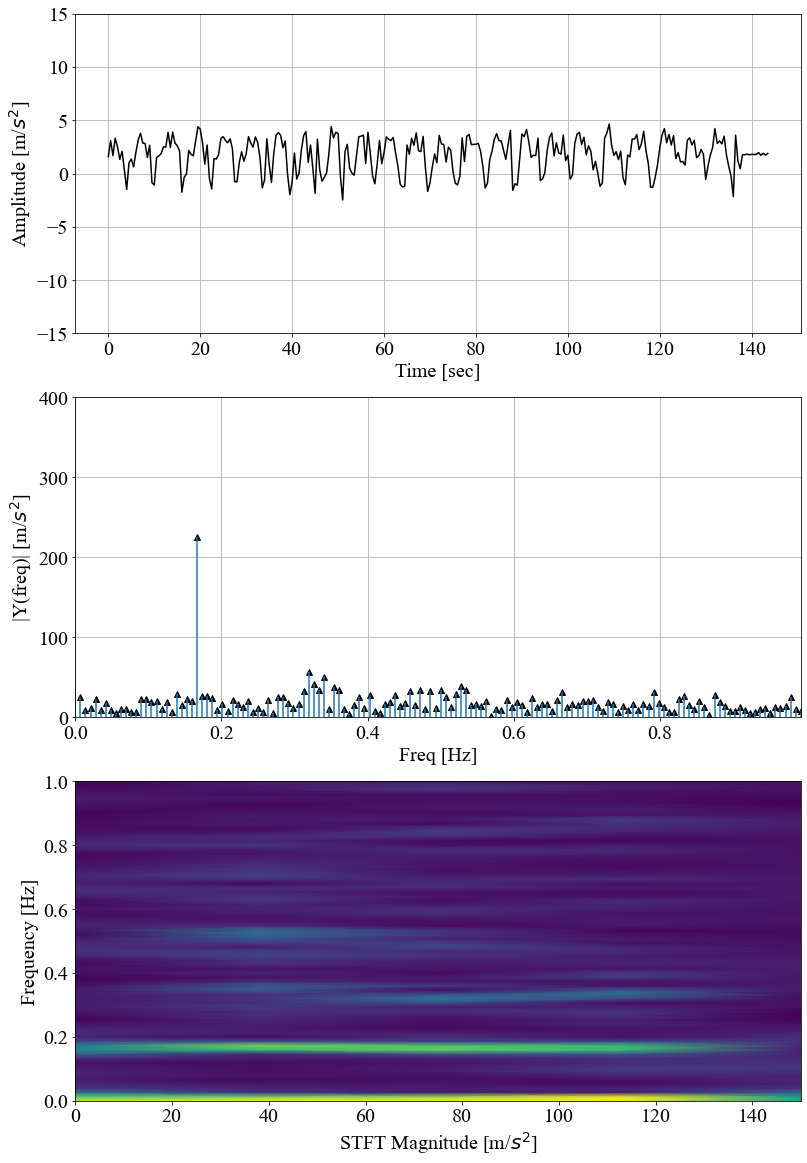

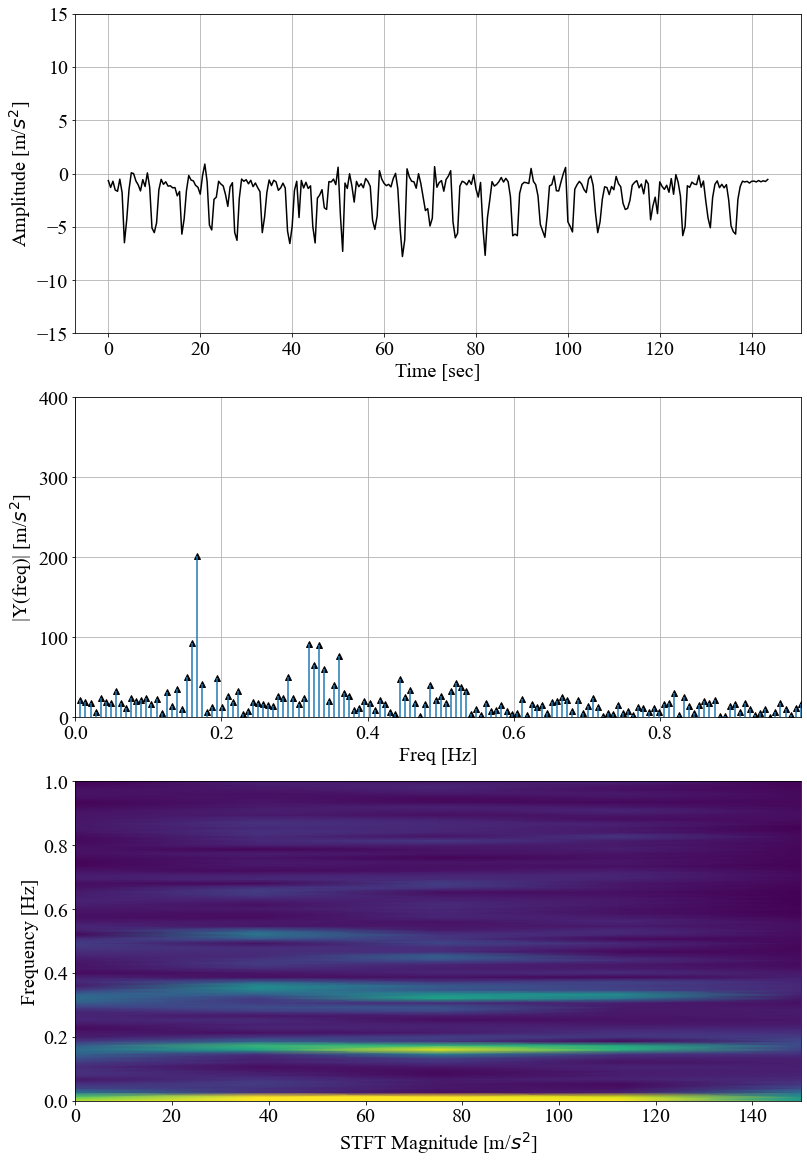

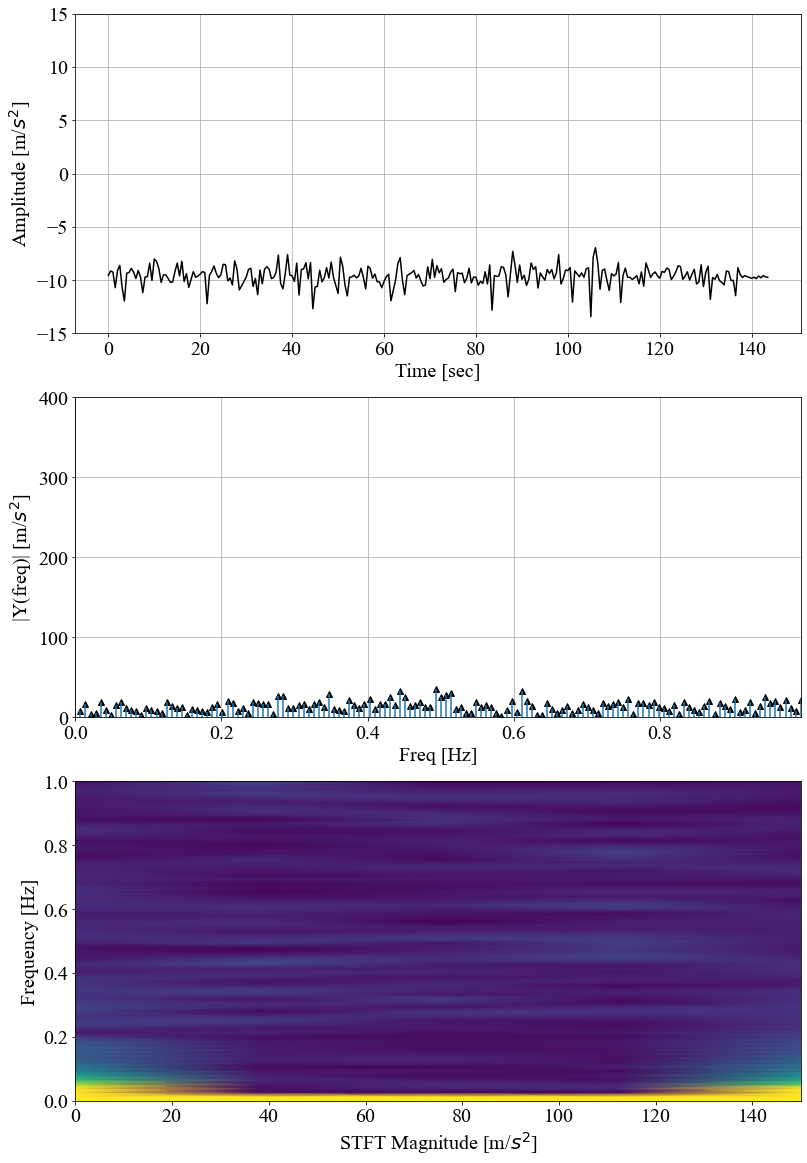

In [4]:
plotFA(time2, df2, nperseg)

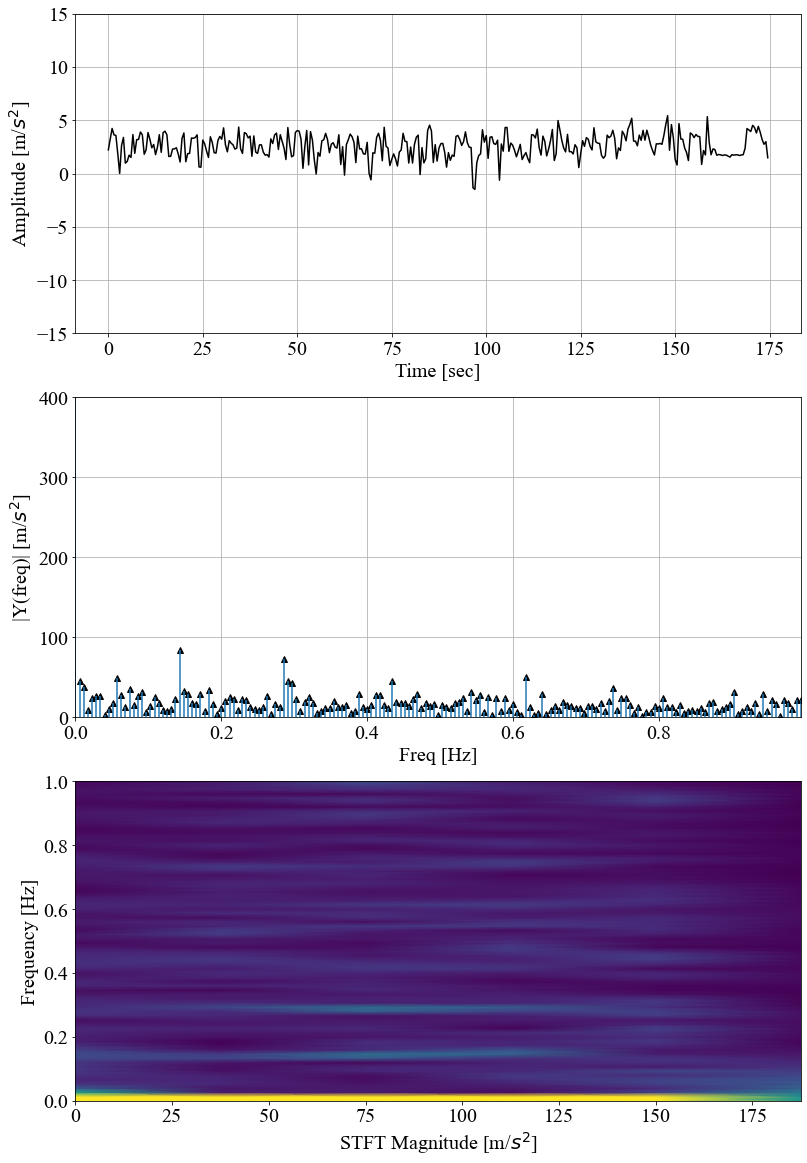

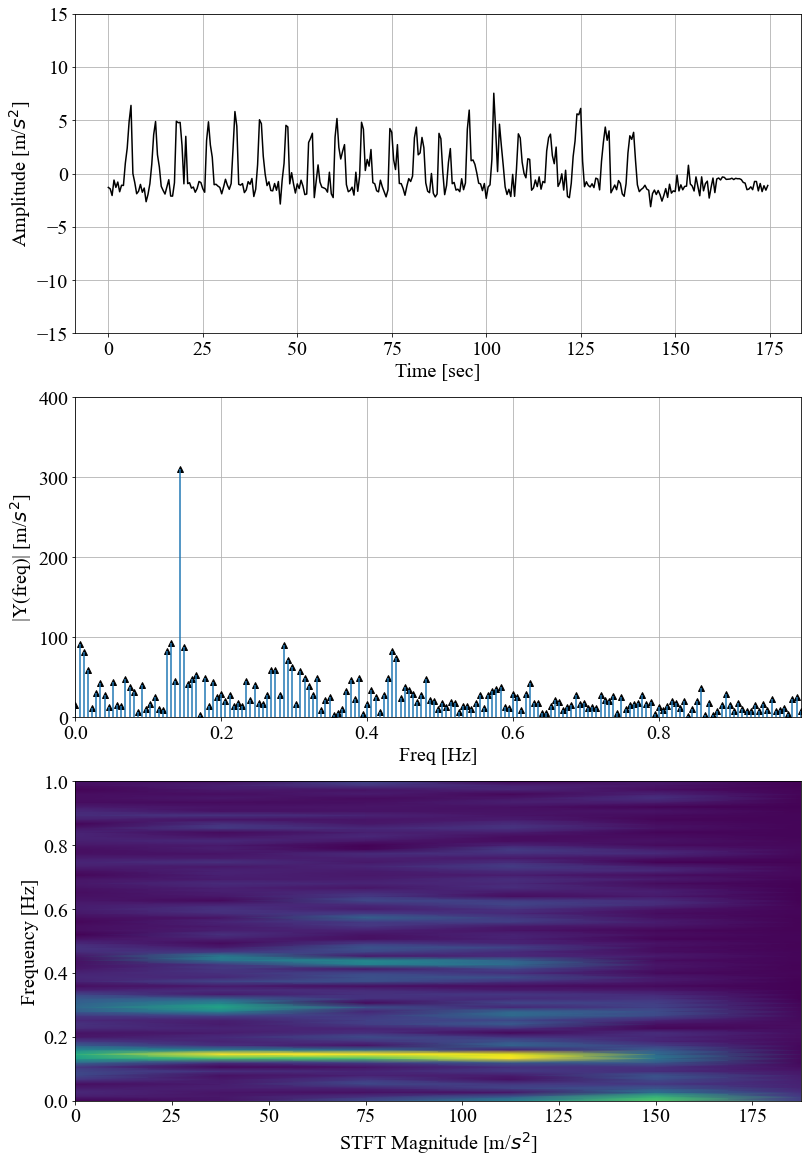

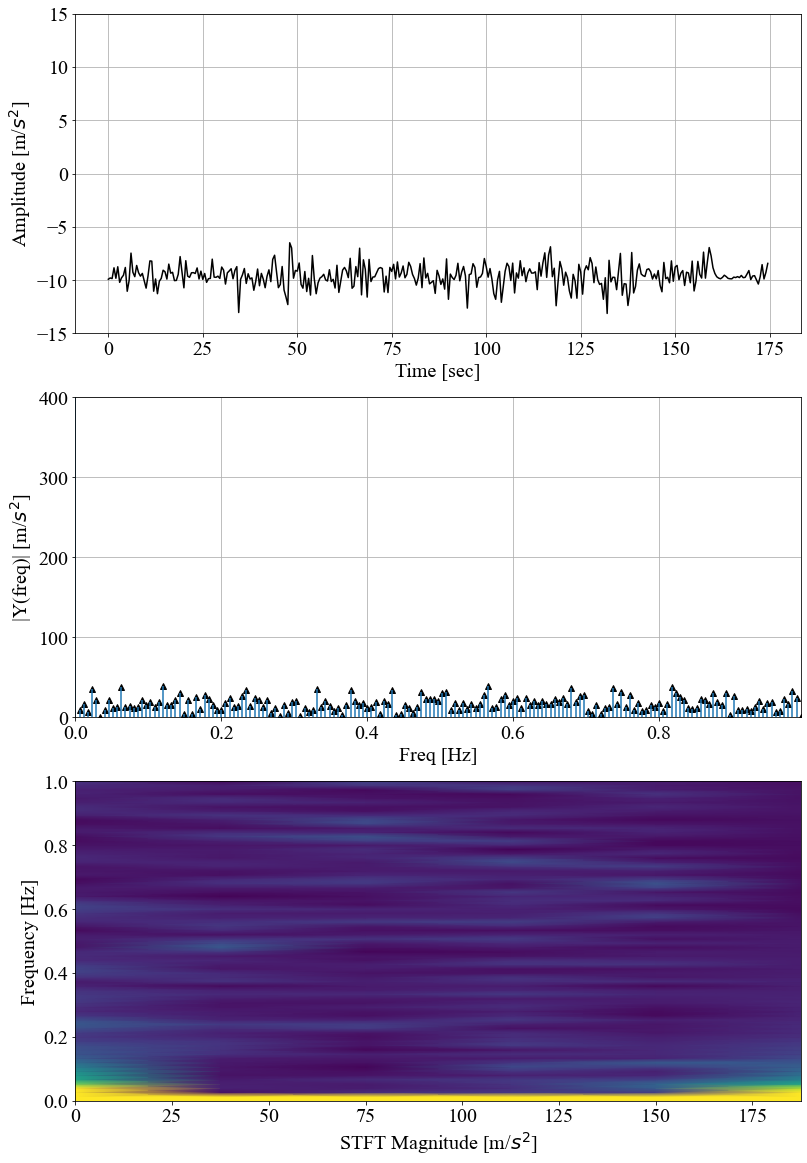

In [5]:
plotFA(time3, df3, nperseg)

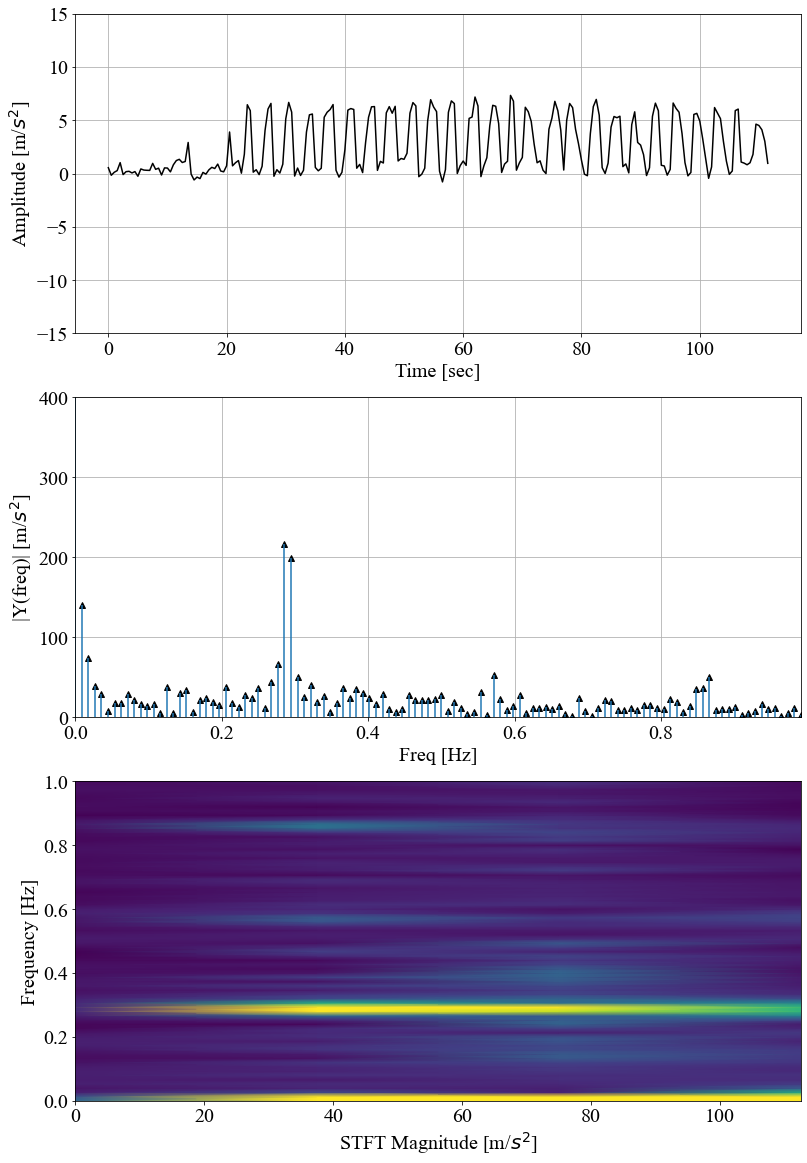

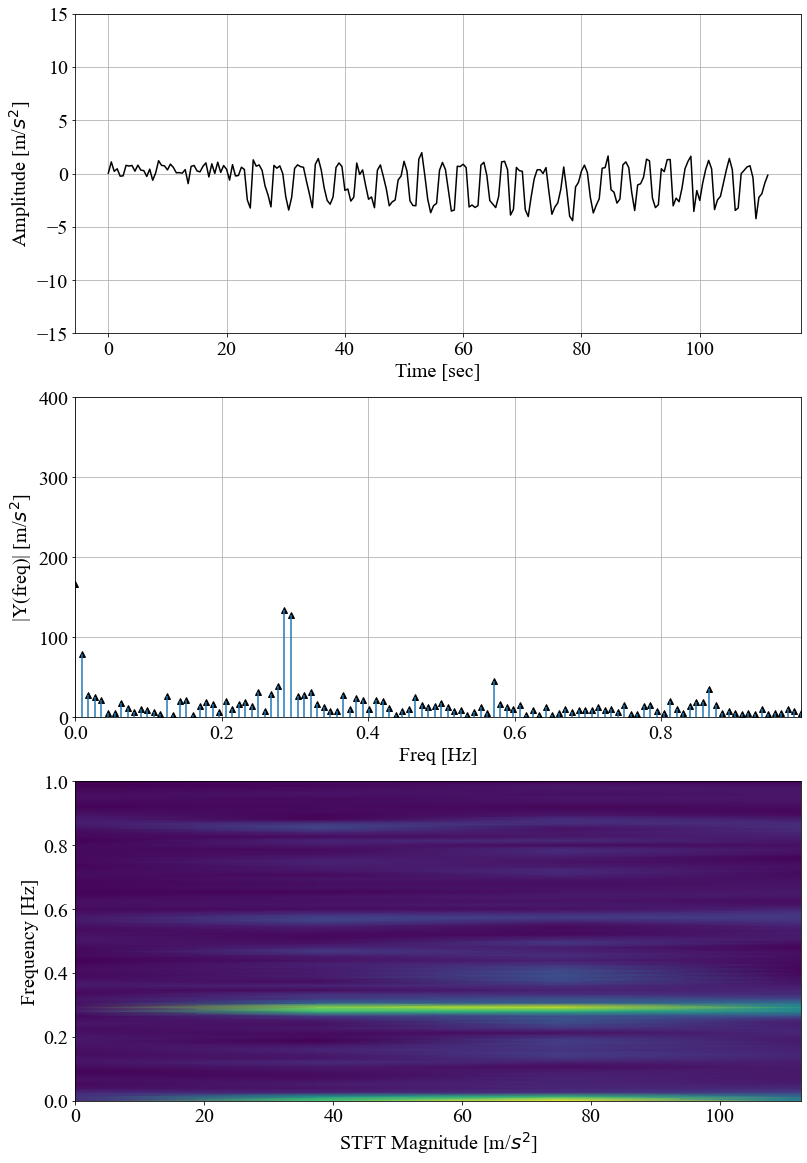

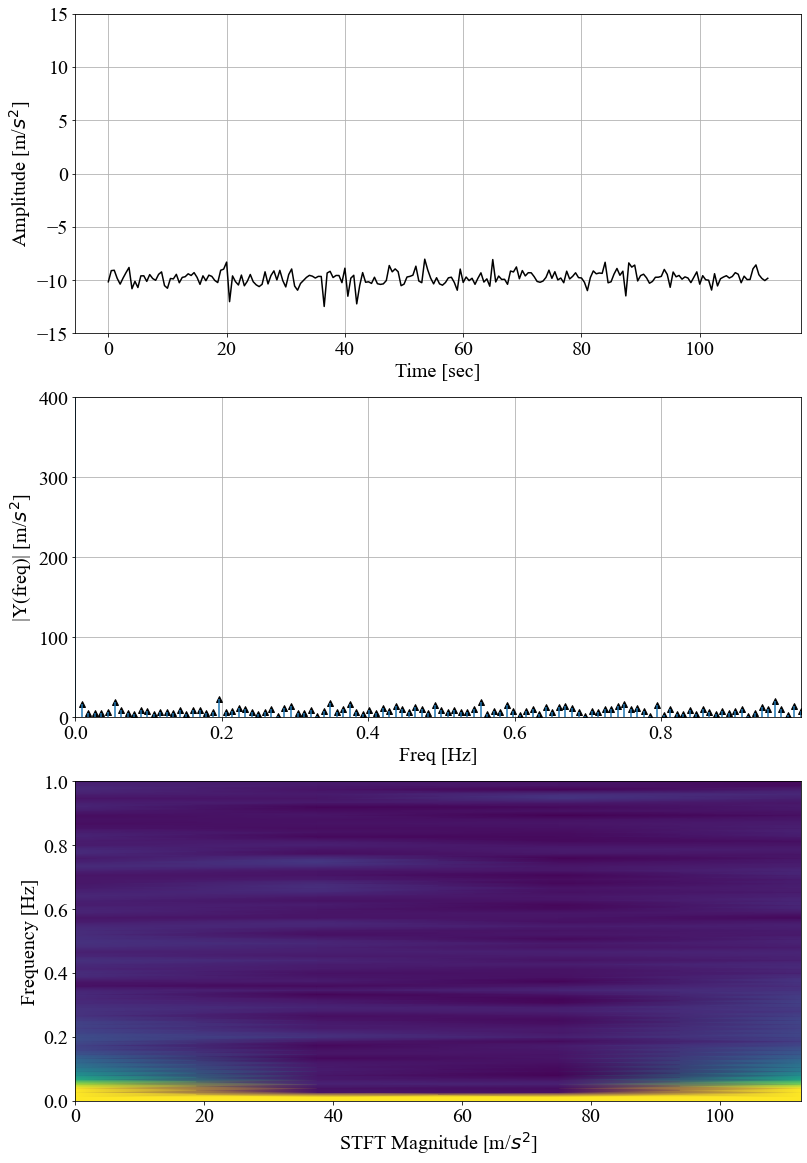

In [6]:
plotFA(time4, df4, nperseg)